Loaded bounding box data: 984 entries
Loaded train/val split: 86524 entries
Analyzing dataset statistics...


Processing images: 100%|████████████████████████| 50/50 [00:01<00:00, 38.74it/s]



Dataset Statistics:
                              0
num_images_analyzed   50.000000
mean_image_height     64.000000
mean_image_width      64.000000
mean_intensity       128.844448
std_intensity         58.617055

Displaying sample images from the dataset:


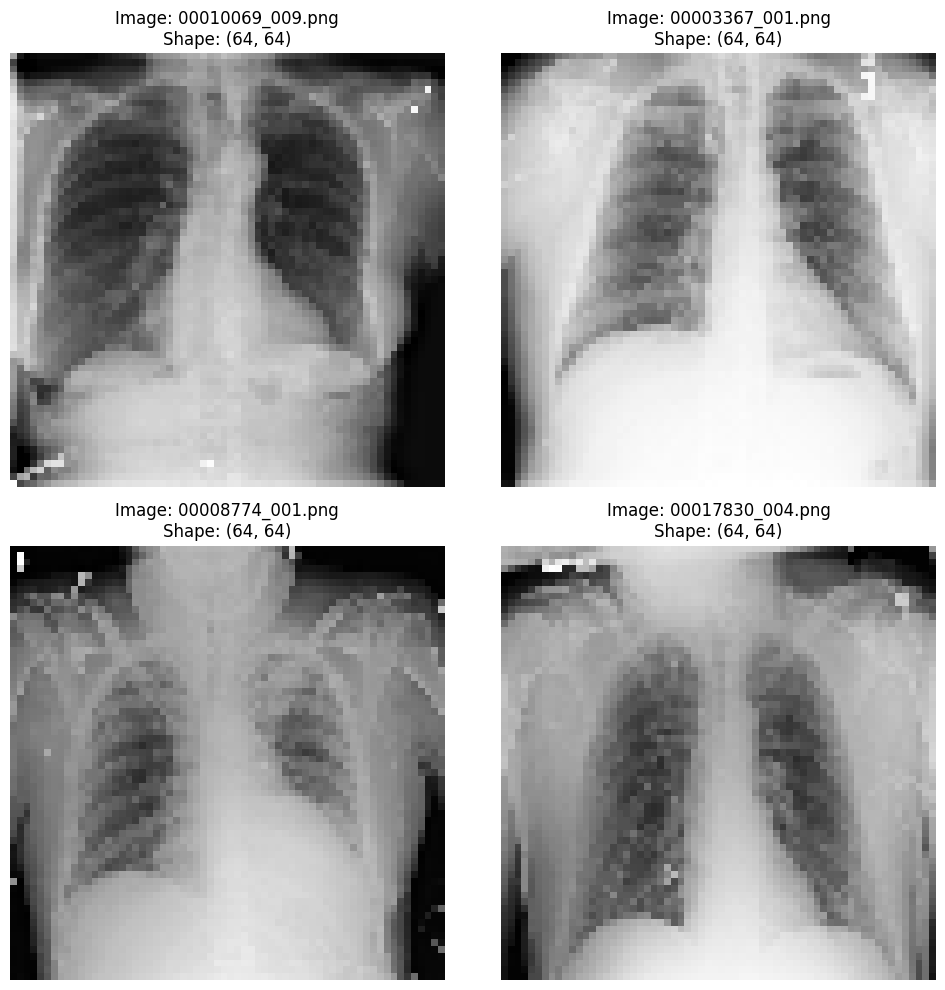


Dataset Structure:
Number of image folders: 12
Number of bounding box annotations: 984
Number of train/val entries: 86524


In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from typing import Dict, List
import warnings
warnings.filterwarnings('ignore')

class ChestXrayAnalyzer:
    """
    An optimized class to analyze the ChestX-ray dataset.
    """
    def __init__(self, base_path: str):
        self.base_path = Path(base_path)
        self.metadata = None
        self.load_metadata()

    def load_metadata(self):
        """Load and merge relevant metadata files"""
        try:
            # Load BBox information
            bbox_path = self.base_path / 'BBox_List_2017.csv'
            if bbox_path.exists():
                self.bbox_data = pd.read_csv(bbox_path)
                print(f"Loaded bounding box data: {len(self.bbox_data)} entries")

            # Load train/val split information
            train_list_path = self.base_path / 'train_val_list.txt'
            if train_list_path.exists():
                with open(train_list_path, 'r') as f:
                    self.train_list = f.read().splitlines()
                print(f"Loaded train/val split: {len(self.train_list)} entries")

        except Exception as e:
            print(f"Error loading metadata: {str(e)}")

    def get_image_folders(self) -> List[Path]:
        """Get all image folder paths"""
        return sorted([d for d in self.base_path.glob('images_*/images') if d.is_dir()])

    def load_image(self, image_path: str) -> np.ndarray:
        """
        Load and preprocess a single image.
        
        Args:
            image_path: Path to the image file
            
        Returns:
            Preprocessed image array
        """
        # Read image in grayscale and resize to 64x64
        img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError(f"Could not load image: {image_path}")
        return cv2.resize(img, (64, 64))

    def analyze_image_properties(self, image: np.ndarray) -> Dict:
        """
        Compute statistical properties of the image.
        
        Args:
            image: 2D numpy array of the image
            
        Returns:
            Dictionary containing image statistics
        """
        return {
            'shape': image.shape,
            'min_value': float(np.min(image)),
            'max_value': float(np.max(image)),
            'mean_value': float(np.mean(image)),
            'std_value': float(np.std(image)),
            'median_value': float(np.median(image))
        }

    def analyze_dataset_statistics(self, sample_size: int = 100) -> Dict:
        """
        Analyze statistics across a sample of images.
        
        Args:
            sample_size: Number of images to analyze
            
        Returns:
            Dictionary containing dataset statistics
        """
        image_folders = self.get_image_folders()
        all_images = []
        stats = []

        print("Analyzing dataset statistics...")
        for folder in image_folders:
            image_files = list(folder.glob('*.png'))
            if image_files:
                all_images.extend(image_files)

        # Sample images if there are more than sample_size
        if len(all_images) > sample_size:
            sampled_images = np.random.choice(all_images, sample_size, replace=False)
        else:
            sampled_images = all_images

        for img_path in tqdm(sampled_images, desc="Processing images", ncols=80):
            try:
                img = self.load_image(str(img_path))
                stats.append(self.analyze_image_properties(img))
            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")

        # Aggregate statistics
        agg_stats = {
            'num_images_analyzed': len(stats),
            'mean_image_height': np.mean([s['shape'][0] for s in stats]),
            'mean_image_width': np.mean([s['shape'][1] for s in stats]),
            'mean_intensity': np.mean([s['mean_value'] for s in stats]),
            'std_intensity': np.mean([s['std_value'] for s in stats])
        }

        return agg_stats

    def visualize_sample_images(self, num_samples: int = 4):
        """
        Visualize a random sample of images from the dataset.
        
        Args:
            num_samples: Number of images to display
        """
        image_folders = self.get_image_folders()
        all_images = []

        for folder in image_folders:
            all_images.extend(list(folder.glob('*.png')))

        if not all_images:
            print("No images found in the dataset")
            return

        sampled_images = np.random.choice(all_images, min(num_samples, len(all_images)), replace=False)

        fig, axes = plt.subplots(2, 2, figsize=(10, 10))
        axes = axes.ravel()

        for idx, img_path in enumerate(sampled_images):
            if idx < len(axes):
                img = self.load_image(str(img_path))
                axes[idx].imshow(img, cmap='gray')
                axes[idx].axis('off')
                axes[idx].set_title(f'Image: {img_path.name}\nShape: {img.shape}')

        plt.tight_layout()
        plt.show()

def main():
    # Initialize analyzer with the correct path
    base_path = "/kaggle/input/data"
    analyzer = ChestXrayAnalyzer(base_path)

    try:
        # Analyze dataset statistics
        stats = analyzer.analyze_dataset_statistics(sample_size=50)
        print("\nDataset Statistics:")
        print(pd.DataFrame([stats]).T)

        # Visualize sample images
        print("\nDisplaying sample images from the dataset:")
        analyzer.visualize_sample_images()

        # Show dataset structure information
        image_folders = analyzer.get_image_folders()
        print("\nDataset Structure:")
        print(f"Number of image folders: {len(image_folders)}")
        if analyzer.bbox_data is not None:
            print(f"Number of bounding box annotations: {len(analyzer.bbox_data)}")
        if analyzer.train_list is not None:
            print(f"Number of train/val entries: {len(analyzer.train_list)}")

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Please check that the data path is correct and contains the expected folder structure.")

if __name__ == "__main__":
    main()

Loaded bounding box data: 984 entries
Loaded train/val split: 86524 entries
Loaded data entry information: 112120 entries

Analyzing dataset statistics...


Analyzing images: 100%|██████████| 500/500 [00:14<00:00, 34.40it/s]



Dataset Statistics:
                              0
num_images_analyzed  500.000000
mean_intensity       127.184108
std_intensity         58.204925
mean_skewness         -0.471637
mean_kurtosis         -0.379784
mean_entropy           5.124885

Analyzing disease distribution...


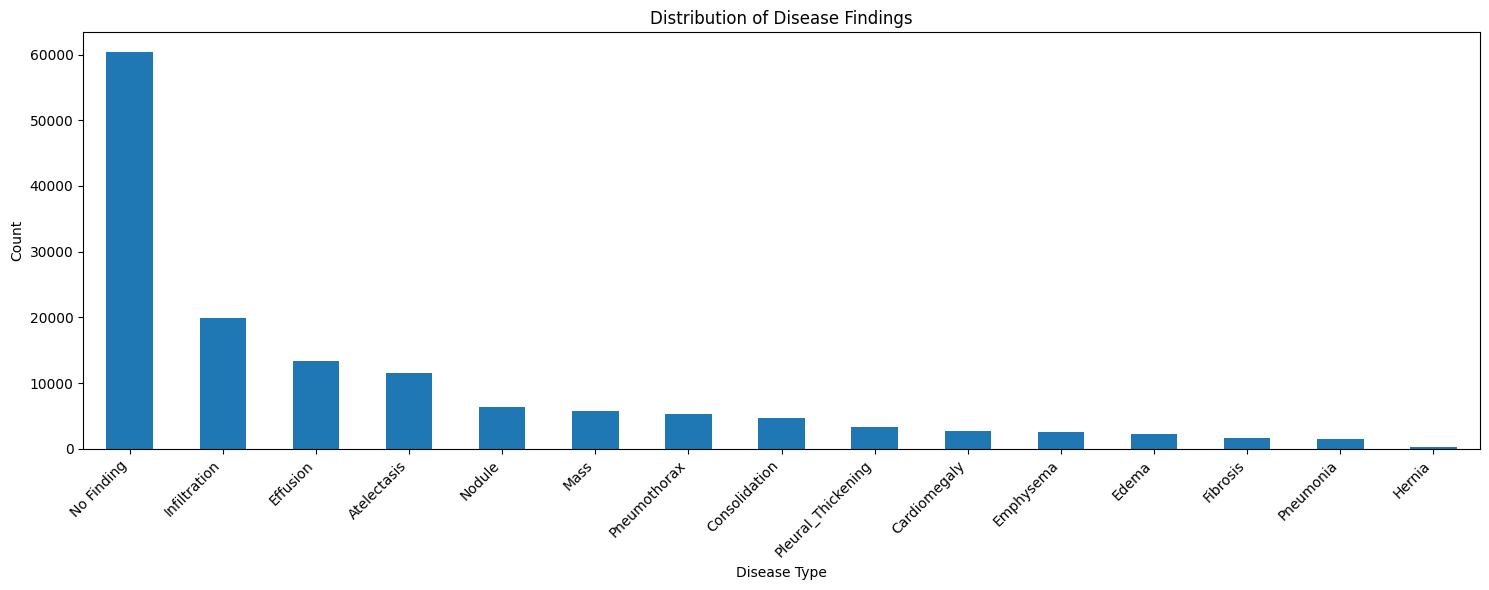


Disease Distribution:
No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: count, dtype: int64

Visualizing intensity distributions...


Computing intensity distributions: 100%|██████████| 500/500 [00:12<00:00, 39.22it/s]


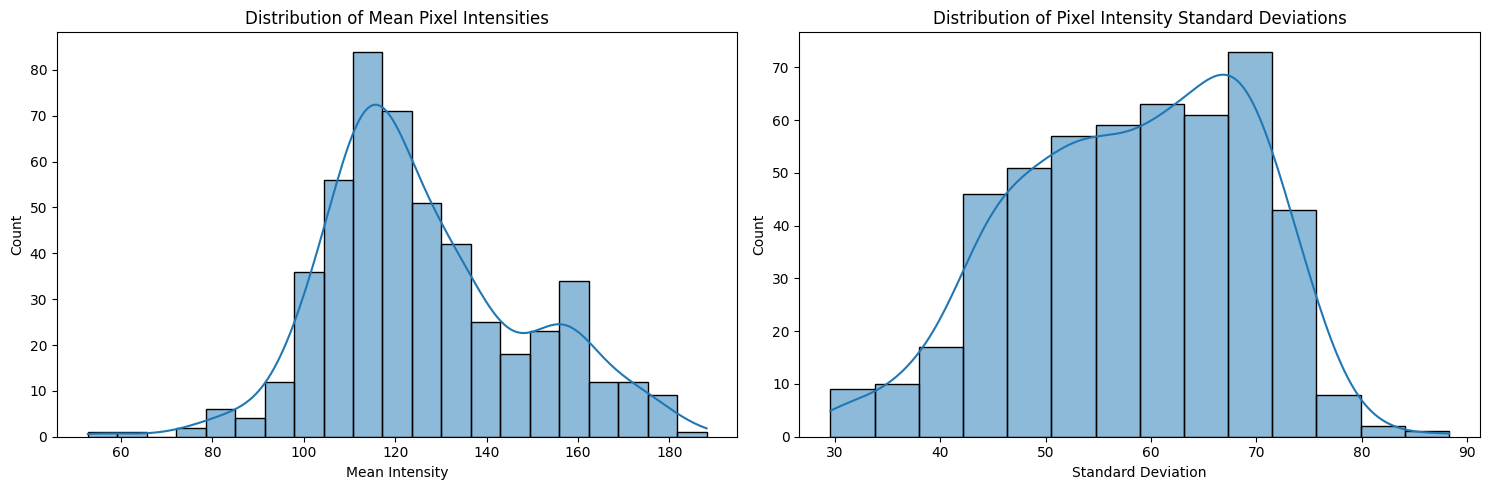


Displaying sample images with histograms...


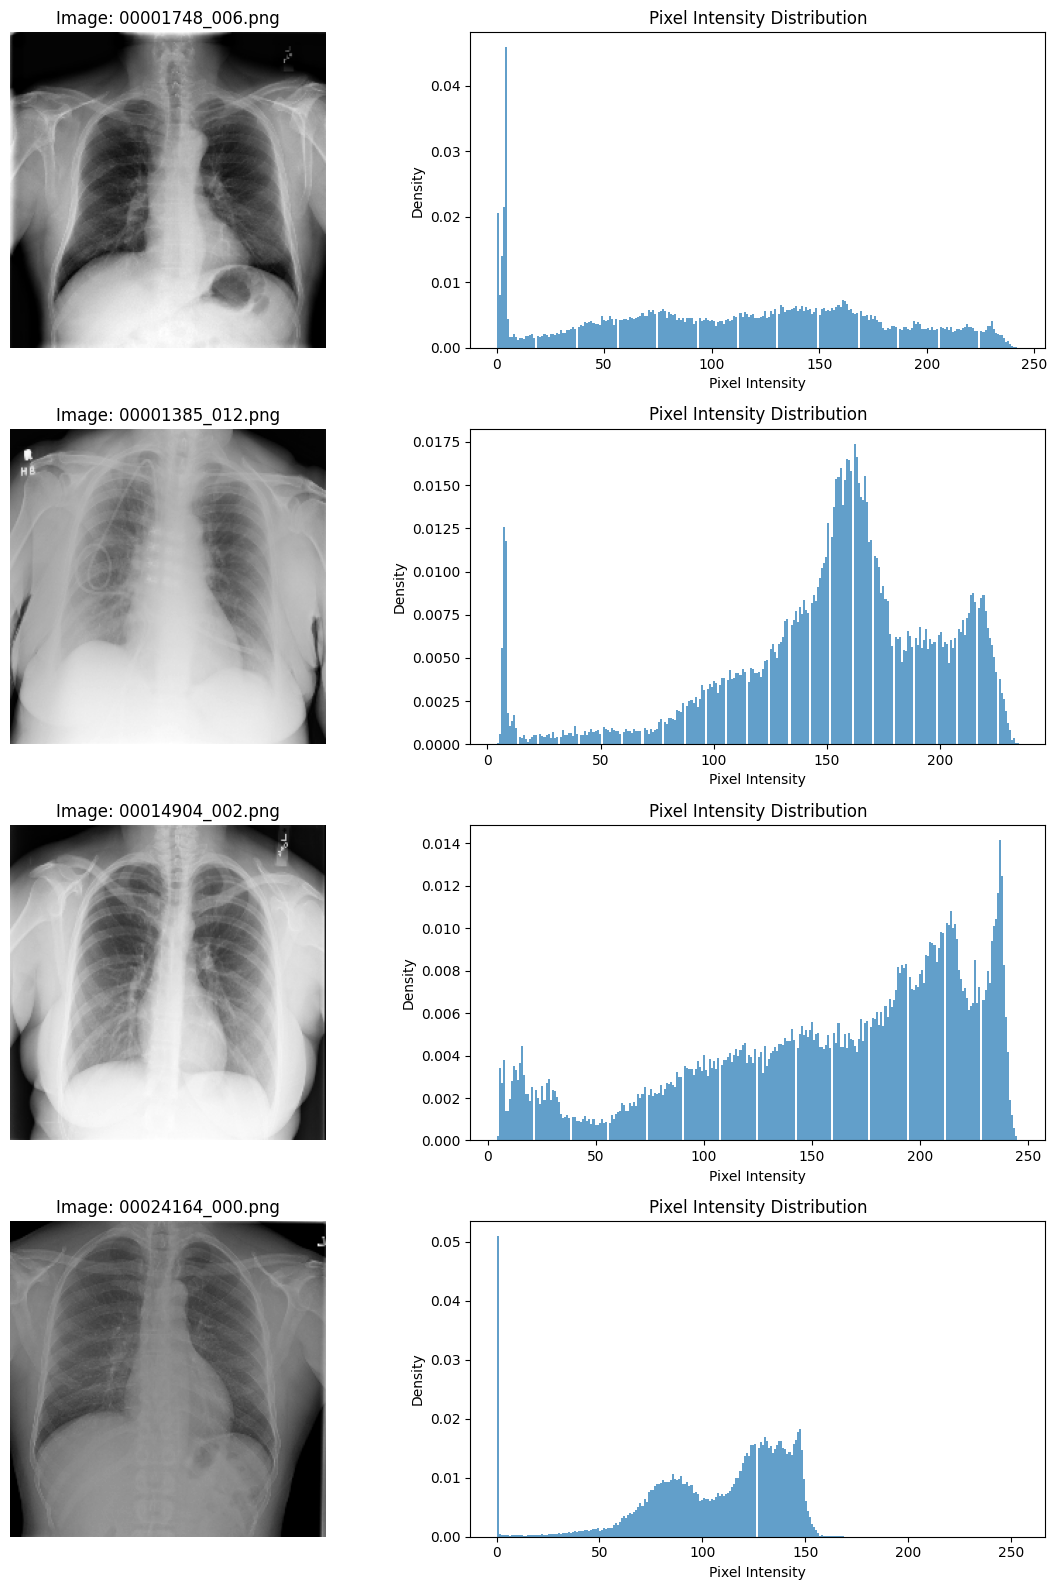

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
from typing import Dict, List, Tuple
from sklearn.decomposition import PCA
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

class EnhancedChestXrayAnalyzer:
    """
    Enhanced analyzer for the ChestX-ray dataset with comprehensive exploration capabilities.
    """
    def __init__(self, base_path: str):
        self.base_path = Path(base_path)
        self.metadata = None
        self.bbox_data = None
        self.train_list = None
        self.data_entry = None
        self.load_metadata()
        
    def load_metadata(self):
        """Load and merge all relevant metadata files"""
        try:
            # Load BBox information
            bbox_path = self.base_path / 'BBox_List_2017.csv'
            if bbox_path.exists():
                self.bbox_data = pd.read_csv(bbox_path)
                print(f"Loaded bounding box data: {len(self.bbox_data)} entries")

            # Load train/val split information
            train_list_path = self.base_path / 'train_val_list.txt'
            if train_list_path.exists():
                with open(train_list_path, 'r') as f:
                    self.train_list = f.read().splitlines()
                print(f"Loaded train/val split: {len(self.train_list)} entries")
                
            # Load Data Entry CSV
            data_entry_path = self.base_path / 'Data_Entry_2017.csv'
            if data_entry_path.exists():
                self.data_entry = pd.read_csv(data_entry_path)
                print(f"Loaded data entry information: {len(self.data_entry)} entries")

        except Exception as e:
            print(f"Error loading metadata: {str(e)}")

    def get_image_paths(self) -> List[Path]:
        """Get all image paths from all folders"""
        image_paths = []
        for folder in self.base_path.glob('images_*/images'):
            if folder.is_dir():
                image_paths.extend(list(folder.glob('*.png')))
        return sorted(image_paths)

    def load_image(self, image_path: str, target_size: Tuple[int, int] = (224, 224)) -> np.ndarray:
        """
        Load and preprocess a single image with flexible sizing
        
        Args:
            image_path: Path to the image file
            target_size: Desired output size (height, width)
            
        Returns:
            Preprocessed image array
        """
        img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError(f"Could not load image: {image_path}")
        return cv2.resize(img, target_size)

    def analyze_image_properties(self, image: np.ndarray) -> Dict:
        """Enhanced image property analysis"""
        properties = {
            'shape': image.shape,
            'min_value': float(np.min(image)),
            'max_value': float(np.max(image)),
            'mean_value': float(np.mean(image)),
            'std_value': float(np.std(image)),
            'median_value': float(np.median(image)),
            'skewness': float(stats.skew(image.ravel())),
            'kurtosis': float(stats.kurtosis(image.ravel())),
            'entropy': float(stats.entropy(np.histogram(image, bins=256)[0]))
        }
        return properties

    def analyze_dataset_statistics(self, sample_size: int = 1000) -> Dict:
        """Comprehensive dataset statistics analysis"""
        all_images = self.get_image_paths()
        stats = []
        
        if len(all_images) > sample_size:
            sampled_images = np.random.choice(all_images, sample_size, replace=False)
        else:
            sampled_images = all_images

        for img_path in tqdm(sampled_images, desc="Analyzing images"):
            try:
                img = self.load_image(str(img_path))
                stats.append(self.analyze_image_properties(img))
            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")

        return self._aggregate_statistics(stats)

    def _aggregate_statistics(self, stats: List[Dict]) -> Dict:
        """Aggregate statistics across multiple images"""
        agg_stats = {
            'num_images_analyzed': len(stats),
            'mean_intensity': np.mean([s['mean_value'] for s in stats]),
            'std_intensity': np.mean([s['std_value'] for s in stats]),
            'mean_skewness': np.mean([s['skewness'] for s in stats]),
            'mean_kurtosis': np.mean([s['kurtosis'] for s in stats]),
            'mean_entropy': np.mean([s['entropy'] for s in stats])
        }
        return agg_stats

    def analyze_disease_distribution(self):
        """Analyze disease distribution in the dataset"""
        if self.data_entry is None:
            print("No data entry information available")
            return

        # Split multiple findings into separate rows
        all_findings = self.data_entry['Finding Labels'].str.split('|', expand=True).stack()
        finding_counts = all_findings.value_counts()
        
        plt.figure(figsize=(15, 6))
        finding_counts.plot(kind='bar')
        plt.title('Distribution of Disease Findings')
        plt.xlabel('Disease Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        return finding_counts

    def visualize_intensity_distribution(self, sample_size: int = 1000):
        """Visualize the distribution of pixel intensities"""
        all_images = self.get_image_paths()
        if len(all_images) > sample_size:
            sampled_images = np.random.choice(all_images, sample_size, replace=False)
        else:
            sampled_images = all_images

        means = []
        stds = []
        
        for img_path in tqdm(sampled_images, desc="Computing intensity distributions"):
            try:
                img = self.load_image(str(img_path))
                means.append(np.mean(img))
                stds.append(np.std(img))
            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot mean intensity distribution
        sns.histplot(means, kde=True, ax=ax1)
        ax1.set_title('Distribution of Mean Pixel Intensities')
        ax1.set_xlabel('Mean Intensity')
        
        # Plot standard deviation distribution
        sns.histplot(stds, kde=True, ax=ax2)
        ax2.set_title('Distribution of Pixel Intensity Standard Deviations')
        ax2.set_xlabel('Standard Deviation')
        
        plt.tight_layout()
        plt.show()

    def visualize_sample_images_with_histograms(self, num_samples: int = 4):
        """Visualize sample images with their corresponding histograms"""
        all_images = self.get_image_paths()
        if not all_images:
            print("No images found in the dataset")
            return

        sampled_images = np.random.choice(all_images, min(num_samples, len(all_images)), replace=False)
        
        fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4*num_samples))
        
        for idx, img_path in enumerate(sampled_images):
            img = self.load_image(str(img_path))
            
            # Plot image
            axes[idx, 0].imshow(img, cmap='gray')
            axes[idx, 0].axis('off')
            axes[idx, 0].set_title(f'Image: {img_path.name}')
            
            # Plot histogram
            axes[idx, 1].hist(img.ravel(), bins=256, density=True, alpha=0.7)
            axes[idx, 1].set_title('Pixel Intensity Distribution')
            axes[idx, 1].set_xlabel('Pixel Intensity')
            axes[idx, 1].set_ylabel('Density')
        
        plt.tight_layout()
        plt.show()

def main():
    # Initialize analyzer with the correct path
    base_path = "/kaggle/input/data"
    analyzer = EnhancedChestXrayAnalyzer(base_path)

    try:
        # 1. Basic Dataset Statistics
        print("\nAnalyzing dataset statistics...")
        stats = analyzer.analyze_dataset_statistics(sample_size=500)
        print("\nDataset Statistics:")
        print(pd.DataFrame([stats]).T)

        # 2. Disease Distribution Analysis
        print("\nAnalyzing disease distribution...")
        disease_counts = analyzer.analyze_disease_distribution()
        print("\nDisease Distribution:")
        print(disease_counts)

        # 3. Visualize Intensity Distributions
        print("\nVisualizing intensity distributions...")
        analyzer.visualize_intensity_distribution(sample_size=500)

        # 4. Sample Images with Histograms
        print("\nDisplaying sample images with histograms...")
        analyzer.visualize_sample_images_with_histograms()

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Please check that the data path is correct and contains the expected folder structure.")

if __name__ == "__main__":
    main()